In [89]:
# import all the useful libraries
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# load data
df = pd.read_csv(r"C:\Users\Oscar_On\Downloads\experiment_dataset.csv")

# show first 5 rows
print(df.head())

   Unnamed: 0  Age   Location   Device    Variant  Time Spent       CTR
0           0   62  Location2  Device2    Control   13.928669  0.084776
1           1   18  Location1  Device1  Variant B   11.310518  0.096859
2           2   21  Location2  Device1  Variant B   24.842100  0.097630
3           3   21  Location1  Device3  Variant B   20.061300  0.109783
4           4   57  Location1  Device2  Variant B   34.495503  0.068579


In [91]:
# show the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [92]:
# drop 'Unamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace = True)

In [93]:
# show the description of the data
df.describe(include='all')

,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,3,3,3,NaN,NaN
top,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,343,346,340,NaN,NaN
mean,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,53.000000,NaN,NaN,NaN,26.255950,0.124238


In [94]:
# show the unique values for the 3 columns
loc = df['Location'].unique()

dev = df['Device'].unique()

var = df['Variant'].unique()

print(loc,dev,var)

['Location2' 'Location1' 'Location3'] ['Device2' 'Device1' 'Device3'] ['Control' 'Variant B' 'Variant A']


## Q1: Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

In [95]:
# Mean of Time Spent for the variant
df_timespent_avg = df.groupby('Variant')['Time Spent'].mean()

# Mean of CTR for the Variant
df_ctr_avg = df.groupby('Variant')['CTR'].mean()

df_timespent_avg

Variant
Control      20.070781
Variant A    24.805547
Variant B    23.343783
Name: Time Spent, dtype: float64

In [96]:
# Calculate the time spent lift for each of the variant
df_timespent_lift = (df_timespent_avg - df_timespent_avg['Control']) / df_timespent_avg['Control'] * 100

# Print the result
print('Time Spent lift for variants:',df_timespent_lift)


Time Spent lift for variants: Variant
Control       0.000000
Variant A    23.590344
Variant B    16.307297
Name: Time Spent, dtype: float64


In [97]:
# Calculate the time spent lift for each of the variant
df_ctr_lift = (df_ctr_avg - df_ctr_avg['Control']) / df_ctr_avg['Control'] * 100

# Print the result
print('Time spent lift for variants:',df_ctr_lift)


Time spent lift for variants: Variant
Control       0.000000
Variant A    22.033917
Variant B    10.531151
Name: CTR, dtype: float64


***Q1 Answer:*** <br>
Both variants have positive effect on Time Spent and CTR Lift. <br> 
Time Spent Lift: Variant A (+23.590344%), Variant B(+16.307297%) <br> 
CTR: Variant A (+22.033917%), Variant B (+10.531151%)  <br>
<br>
<br>
<br>
<br>

## Q2 Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

T-Test for Time Spent

In [98]:
# create dataframe for each type of variant with respect to time spent
varA_ts = df[df['Variant'] == 'Variant A']['Time Spent']
varB_ts = df[df['Variant'] == 'Variant B']['Time Spent']
control_ts = df[df['Variant'] == 'Control']['Time Spent']

# do the T-Test comparing Control and Variant A
t_stat, p_value = stats.ttest_ind(control_ts, varA_ts)

print('T-Test by comparing Control and Variant A')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}",'\n')

# do the T-Test comparing Control and Variant B
t_stat, p_value = stats.ttest_ind(control_ts, varB_ts)

print('T-Test by comparing Control and Variant B')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}",'\n')

# do the T-Test comparing Variant A and Variant B
t_stat, p_value = stats.ttest_ind(varA_ts, varB_ts)

print('T-Test by comparing Variant A and Variant B')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-Test by comparing Control and Variant A
T-statistic: -12.142363487472364
P-value: 8.488565644996449e-31 

T-Test by comparing Control and Variant B
T-statistic: -8.174237395991806
P-value: 1.496358076285182e-15 

T-Test by comparing Variant A and Variant B
T-statistic: 3.6788175394209075
P-value: 0.0002534771014765265


T-Test for CTR

In [99]:
# create dataframe for each type of variant with respect to CTR
varA_ctr = df[df['Variant'] == 'Variant A']['CTR']
varB_ctr = df[df['Variant'] == 'Variant B']['CTR']
control_ctr = df[df['Variant'] == 'Control']['CTR']

# do the T-Test comparing Control and Variant A
t_stat, p_value = stats.ttest_ind(control_ctr, varA_ctr)

print('T-Test by comparing Control and Variant A')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}",'\n')

# do the T-Test comparing Control and Variant B
t_stat, p_value = stats.ttest_ind(control_ctr, varB_ctr)

print('T-Test by comparing Control and Variant B')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}", '\n')

# do the T-Test comparing Variant A and Variant B
t_stat, p_value = stats.ttest_ind(varA_ctr, varB_ctr)

print('T-Test by comparing Variant A and Variant B')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-Test by comparing Control and Variant A
T-statistic: -13.829424737499187
P-value: 1.9602781373243157e-38 

T-Test by comparing Control and Variant B
T-statistic: -6.4718143491783255
P-value: 1.8743198199982106e-10 

T-Test by comparing Variant A and Variant B
T-statistic: 7.08499696316128
P-value: 3.587180487986577e-12


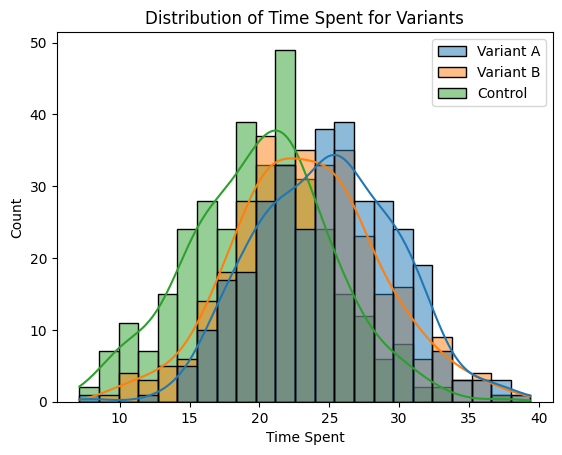

In [100]:
# combine three dataframe to one
combined_data = pd.concat([varA_ts, varB_ts, control_ts], axis=1)
combined_data.columns = ['Variant A', 'Variant B', 'Control']

# plot the histograms for all three DataFrames together
sns.histplot(data=combined_data, kde=True)

# add labels and title
plt.xlabel('Time Spent')
plt.ylabel('Count')
plt.title('Distribution of Time Spent for Variants')

# display the plot
plt.show()

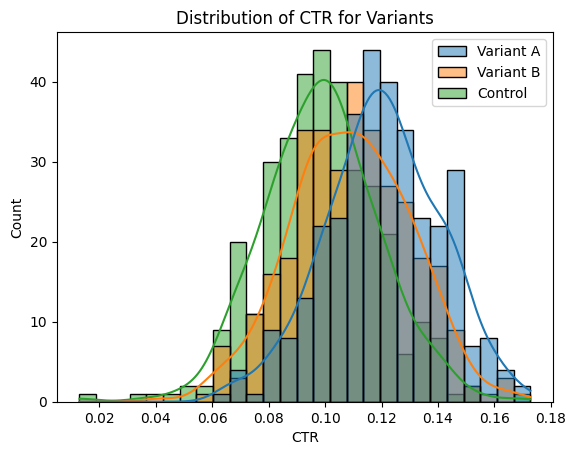

In [101]:
# combine three dataframe to one
combined_data = pd.concat([varA_ctr, varB_ctr, control_ctr], axis=1)
combined_data.columns = ['Variant A', 'Variant B', 'Control']

# plot the histograms for all three DataFrames together
sns.histplot(data=combined_data, kde=True)

# add labels and title
plt.xlabel('CTR')
plt.ylabel('Count')
plt.title('Distribution of CTR for Variants')

# display the plot
plt.show()

Above histplots show that the Time Spent and CTR for the three variants are normally distributed. Therefore, we can perform ANOVA test.<br> 

ANOVA test for Time Spent of the variants

In [102]:
# ANOVA test for Time Spent of the variants
f_stat, p_val = stats.f_oneway(control_ts, varA_ts, varB_ts)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 75.60840947416146
P-value: 2.676826588910432e-31


ANOVA test for CTR of the variants

In [103]:
# ANOVA test for CTR of the variants
f_stat, p_val = stats.f_oneway(control_ctr, varA_ctr, varB_ctr)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 93.588915936227
P-value: 5.638952705781955e-38


***Q2 Answer:*** <br>
The T-Test and ANOVA Test of all the variants are having p value < 0.05<br> 
Therefore, null hypothesis can be rejected, there is a statistically significant difference between both features (Variant A & B) and the control group.  <br> 
<br>
<br>
<br>

## Q3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy.

***Q3 Answer:*** <br>
By looking at the T-Test and ANOVA test, there is statistically significant difference between both features (Variant A & B) and the control group, so we can compare thw variants with the control.<br> 
I would recommend the team to deploy the feature of Variant A. From the lift calculation in Q1, Variant A is having a higher lift in both Time Spent (23.59% > 16.31%) and CTR (22.03% > 10.53%).<br>
However the recommendation may differ with more information on the costs of each feature and other useful factors.<br> 
<br>
<br>
<br>

## Q4. Create a roll-out plan. How quickly will you introduce the feature to your audience?.

In [104]:
# Create dataframe for Variant A
df_varA = df[df['Variant'] == 'Variant A']

In [105]:
# Mean of Time Spent for the locations of Variant A
varA_Loc_timespent_avg = df_varA.groupby('Location')['Time Spent'].mean()

# Mean of CTR for the locations of Variant A
varA_loc_ctr_avg = df_varA.groupby('Location')['CTR'].mean()

# Print the time spent mean of all the locations
print('Time Spent mean of all locations:', varA_Loc_timespent_avg, '\n')

# Print the CTR mean of all the locations
print('CTR mean of all locations:', varA_loc_ctr_avg)

Time Spent mean of all locations: Location
Location1    24.735102
Location2    24.702119
Location3    24.986999
Name: Time Spent, dtype: float64 

CTR mean of all locations: Location
Location1    0.122517
Location2    0.120317
Location3    0.118095
Name: CTR, dtype: float64


In [106]:
# Mean of Time Spent for the devices of Variant A
varA_dev_timespent_avg = df_varA.groupby('Device')['Time Spent'].mean()

# Mean of CTR for the devices of Variant A
varA_dev_ctr_avg = df_varA.groupby('Device')['CTR'].mean()

# Print the time spent mean of all the devices
print('Time Spent mean of all devices:', varA_dev_timespent_avg, '\n')

# Print the ctr mean of all the devices
print('CTR mean of all devices:', varA_dev_ctr_avg)

Time Spent mean of all devices: Device
Device1    25.204105
Device2    24.450906
Device3    24.769778
Name: Time Spent, dtype: float64 

CTR mean of all devices: Device
Device1    0.122732
Device2    0.120637
Device3    0.117770
Name: CTR, dtype: float64


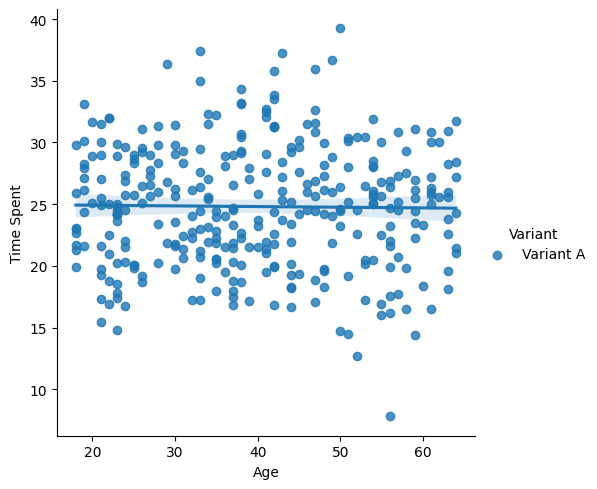

In [109]:
# show the relationship between age and time spent
sns.lmplot(data = df_varA, x='Age', y='Time Spent', hue = 'Variant')

There is not correlation betweeb Age and Time Spent.

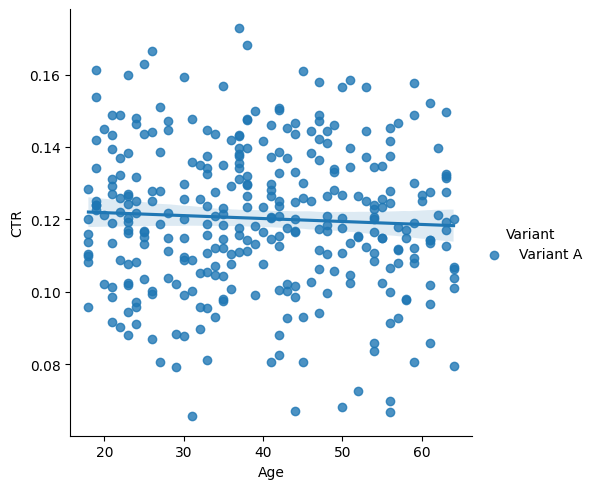

In [110]:
# show the relationship between age and ctr
sns.lmplot(data = df_varA, x='Age', y='CTR', hue = 'Variant')

There is not correlation betweeb Age and Time Spent. 
<br>

***Q4 Answer:*** <br>
I will introduce the Variant A to the audience now. Since the analysis shows that Variant A can archieve a lift in Time Spent and CTR.<br> 
For the roll-out plan, I suggest the following: <br>
1. Deploy the Variant A in Device1 as it has the highest mean of Time Spent (25.204105) and CTR (0.122732).<br>
2. Team can deploy the features in all three locations as they have a close mean of Time Spent and CTR. If they can only choose one location, they should have a further investigation and testing. Since there is not any location has the highest Time Spent and CTR<br>
3. Target all age group, as there is lack of correlation between age and both "Time Spent" and "CTR.<br>